In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import urllib
from urllib.request import urlretrieve
import string
pd.options.display.max_columns=30

In [2]:
train=pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [26]:
def create_amenities_set(data):
    translator=str.maketrans({"{":"","}":"",'''"''':""})
    temp=data["amenities"].str.translate(translator).str.split(",")
    amenities_set=set()
    for i in range(len(temp)):
        amenities_set.update(temp[i])
    return amenities_set

In [158]:
def get_image(url):
    name=re.findall("(\w+\.jpg)",os.path.basename(url))[0]
    if name not in os.listdir(): urlretrieve(url,name)     

In [166]:
def image_retrieve(data,path):
    os.chdir(path)
    data["thumbnail_url"].apply(lambda x: get_image(x) if not pd.isnull(x) else None)

In [ ]:
image_retrieve(train.copy(),"C:\\Users\\abhibiswas\\Documents\\AirBnB_Competition\\AirBnB\\images\\train")

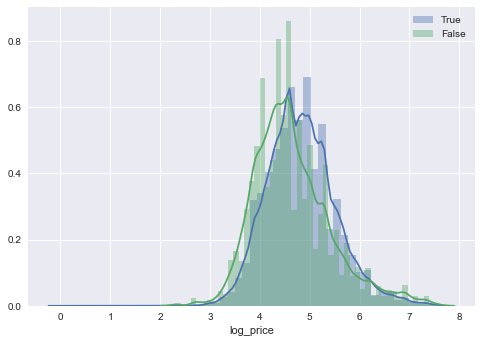

In [179]:
sns.distplot(train[train["cleaning_fee"]==True]["log_price"],label="True")
sns.distplot(train[train["cleaning_fee"]==False]["log_price"],label="False")
plt.legend()
plt.show()

In [28]:
train_amenities_set=create_amenities_set(train.copy())
test_amenities_set=create_amenities_set(test.copy())

In [183]:
train.select_dtypes(include=["object"]).columns.drop(["amenities","name","description","first_review","host_since","host_response_rate","last_review","neighbourhood","thumbnail_url"])

Index(['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
       'zipcode'],
      dtype='object')

In [186]:
train.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

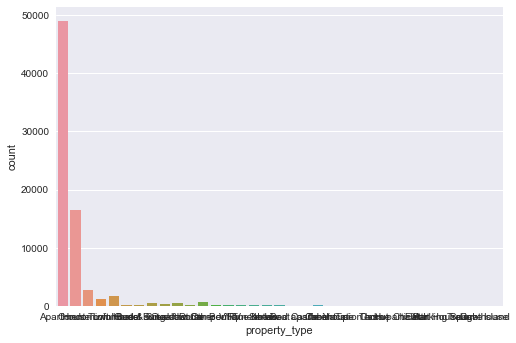

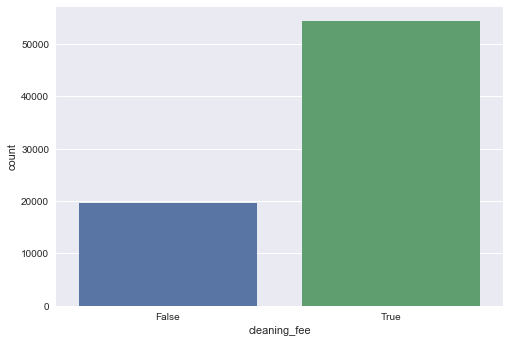

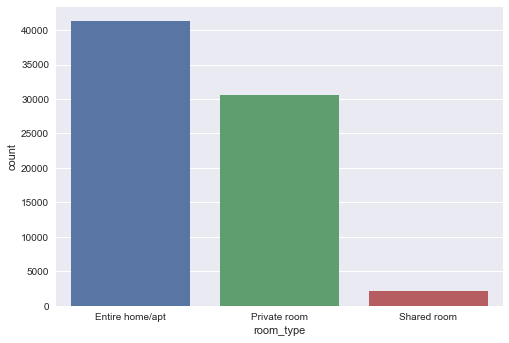

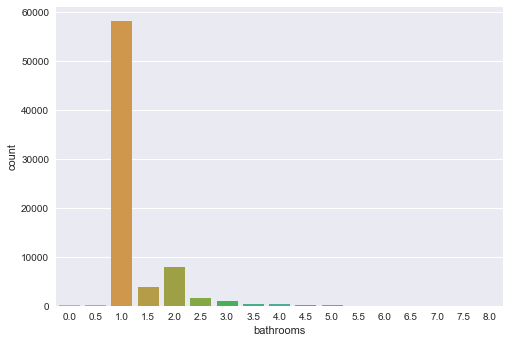

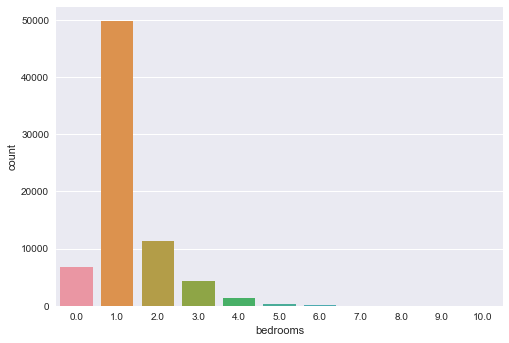

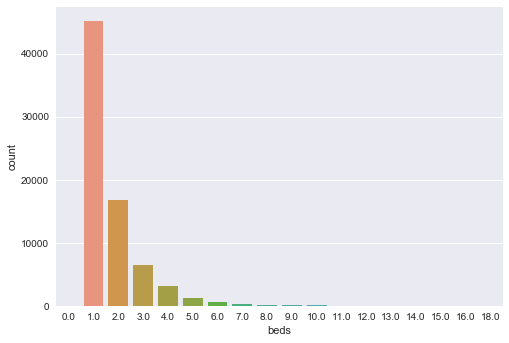

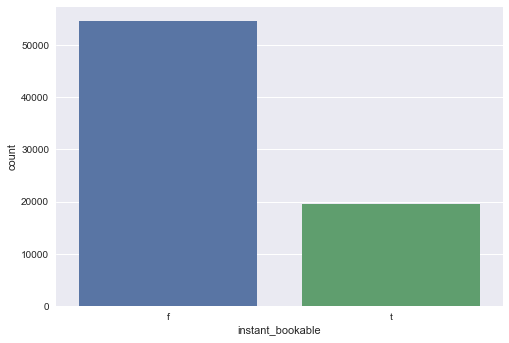

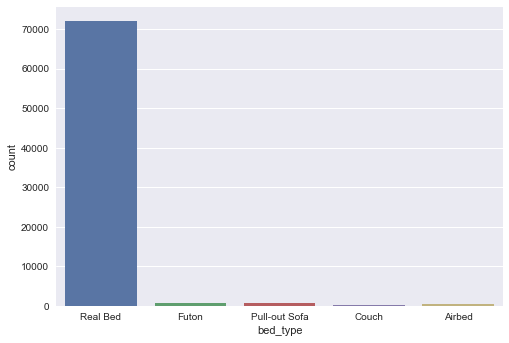

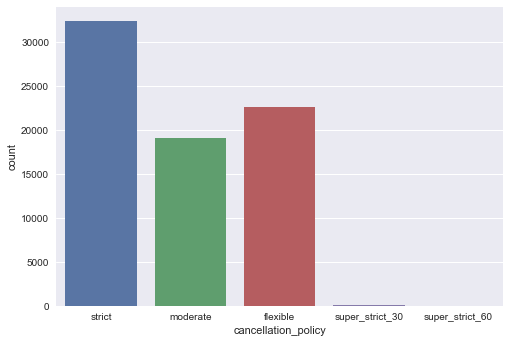

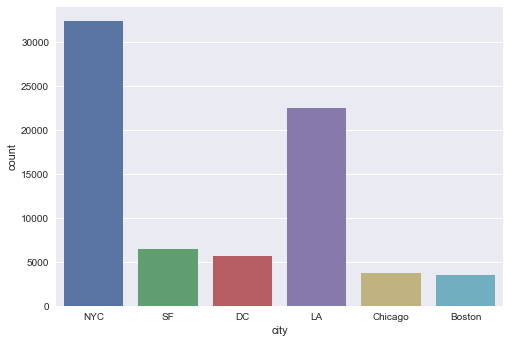

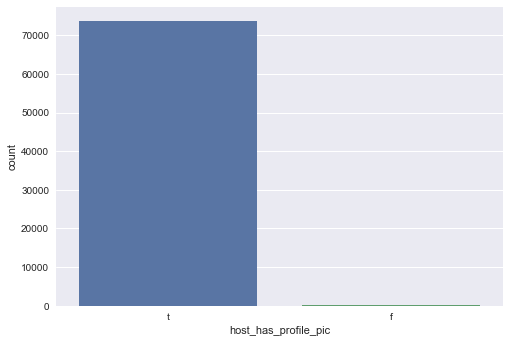

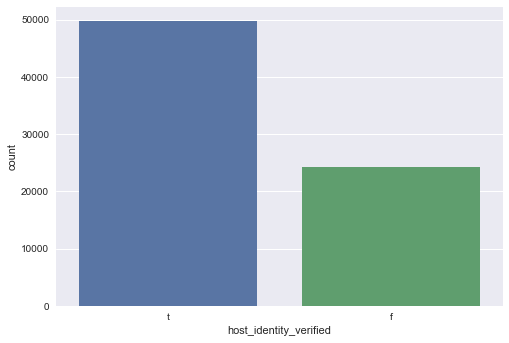

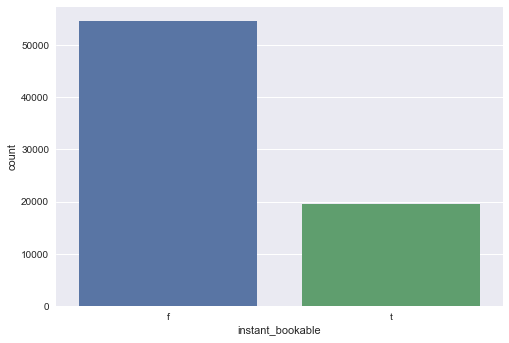

In [215]:
var=['property_type','cleaning_fee','room_type','bathrooms',"bedrooms","beds",'instant_bookable','bed_type', 'cancellation_policy', 'city','host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
for col in var :
    plt.figure()
    sns.countplot(train[col])
    plt.show()

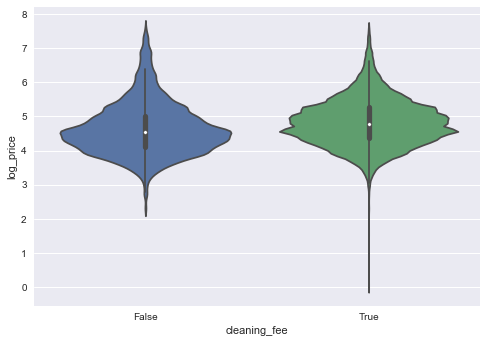

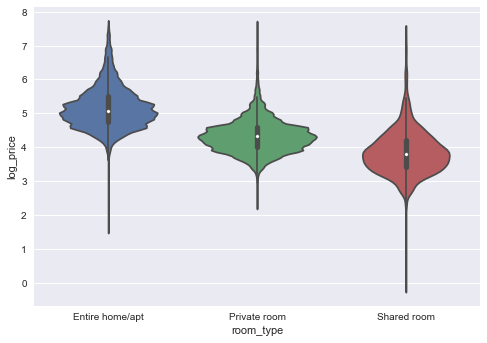

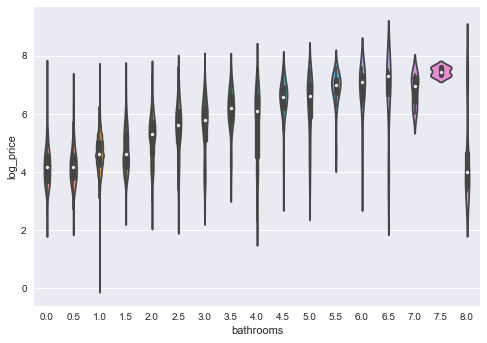

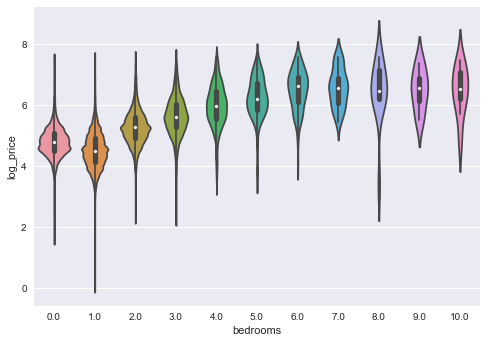

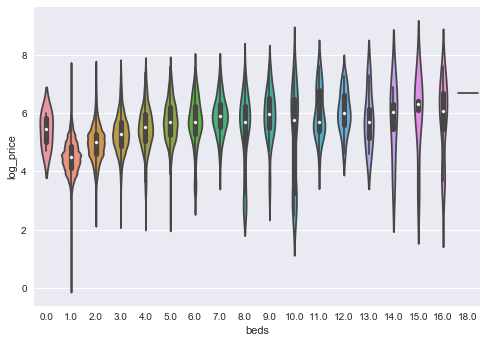

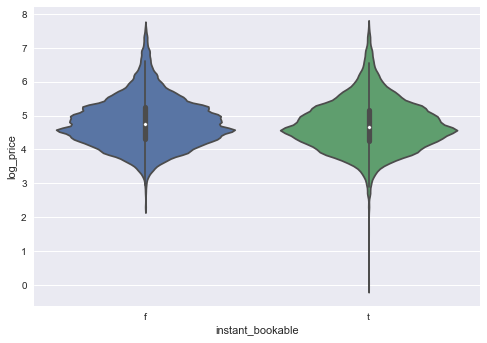

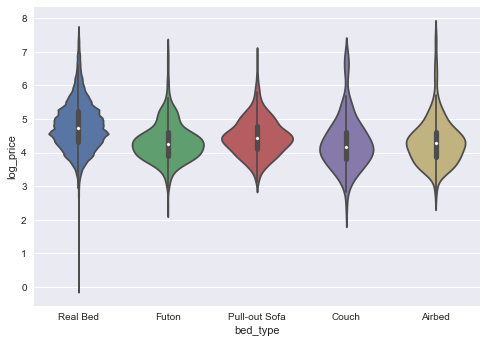

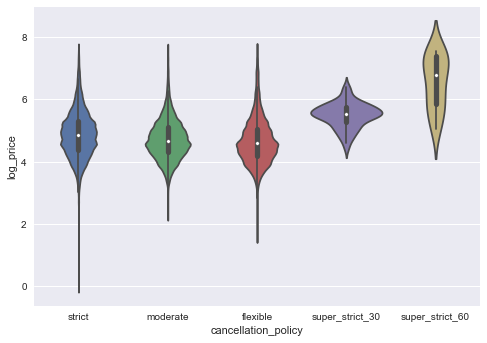

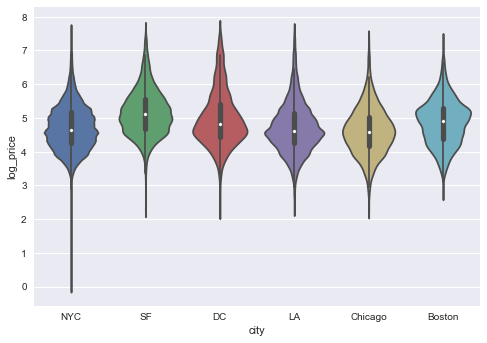

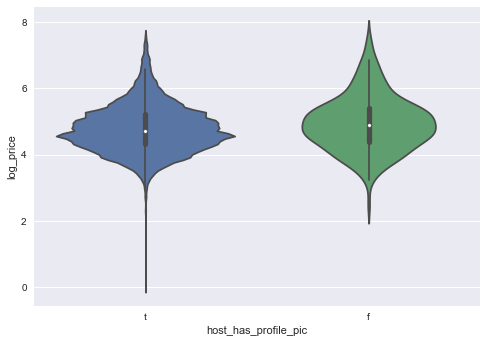

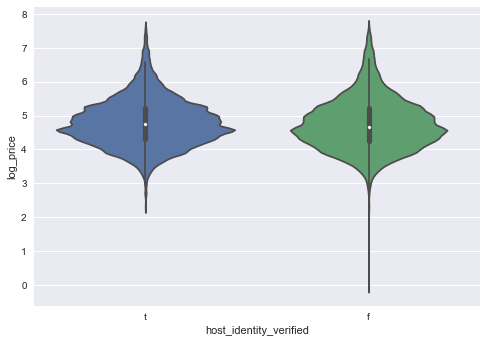

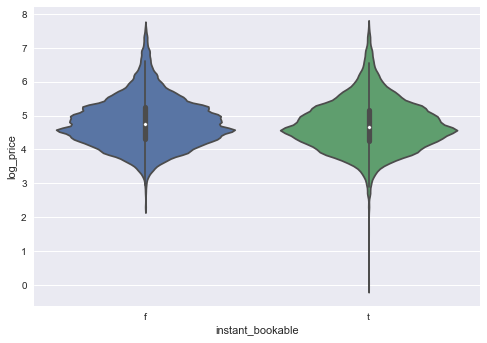

In [216]:
for col in var[1:]:
    plt.figure()
    sns.violinplot(x=col,y="log_price",data=train)
    plt.show()

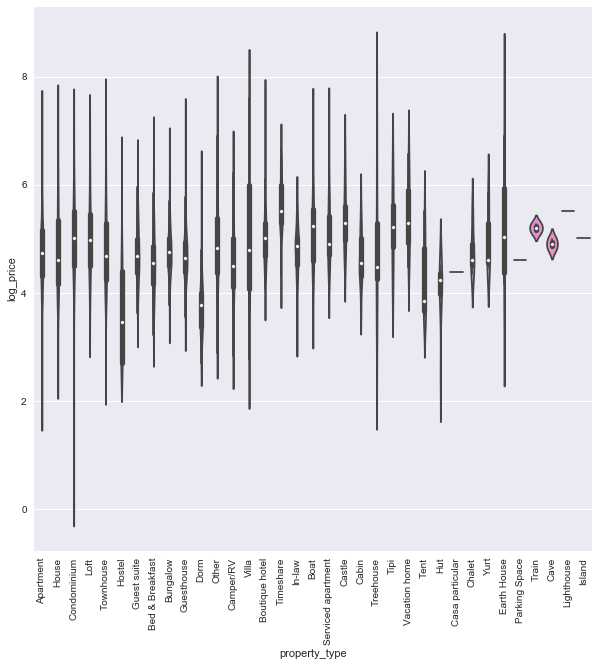

In [210]:
fig=plt.figure(figsize=(10,10))
sns.violinplot(x=cat_var[0],y="log_price",data=train)
ax=plt.gca()
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)

plt.show()

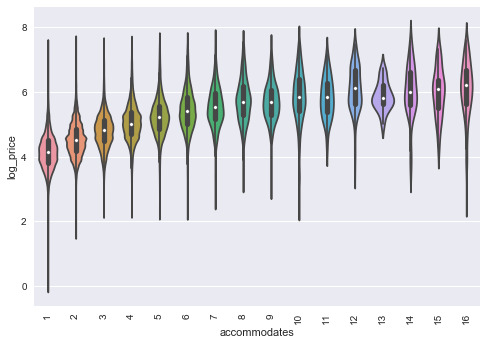

In [229]:
sns.violinplot(x="accommodates",y="log_price",data=train)
ax=plt.gca()
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.show()

In [43]:
train.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

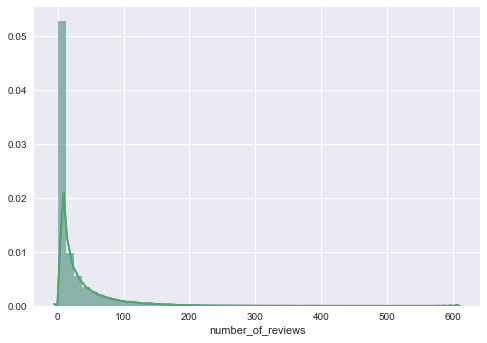

In [46]:
sns.distplot(train["number_of_reviews"])
plt.show()

In [51]:
train["number_of_reviews"].quantile()

487.067999999912

In [64]:
train[train["city"]=="NYC"]["log_price"].quantile(0.1)

3.912023005428147

In [82]:
len(train[train["city"]=="NYC"]["zipcode"].unique())

292

In [92]:
(train[train["city"]=="NYC"]["neighbourhood"].value_counts())

Williamsburg           2862
Bedford-Stuyvesant     2166
Bushwick               1601
Upper West Side        1396
Harlem                 1374
Hell's Kitchen         1299
Upper East Side        1206
Crown Heights          1076
Astoria                 898
Lower East Side         833
East Village            814
East Harlem             793
Chelsea                 726
Greenpoint              725
Washington Heights      721
Hamilton Heights        628
Alphabet City           619
Clinton Hill            618
West Village            606
Park Slope              601
Flatbush                551
Midtown East            441
Lefferts Garden         341
Kips Bay                334
Financial District      323
Midtown                 319
Chinatown               295
Greenwich Village       293
Jamaica                 279
Fort Greene             272
                       ... 
Grasmere                  4
West Farms                4
Co-op City                3
Fresh Meadows             3
Marine Park         

In [91]:
train.groupby(["city","neighbourhood"])["log_price"].median()["NYC"].sort_values(ascending=False)

neighbourhood
Mill Basin                       6.214608
Emerson Hill                     6.138033
Graniteville                     5.703782
Castleton Corners                5.594711
Tottenville                      5.556828
Todt Hill                        5.521461
Tribeca                          5.521461
Noho                             5.521461
Rossville                        5.501258
Battery Park City                5.416100
Flatiron District                5.393628
Union Square                     5.372635
Midtown                          5.342334
Lighthouse HIll                  5.298317
West Village                     5.298317
Soho                             5.298317
Hudson Square                    5.298317
Meatpacking District             5.283152
Nolita                           5.280633
Chelsea                          5.247024
Greenwich Village                5.247024
DUMBO                            5.231051
Midtown East                     5.220356
Huguenot            

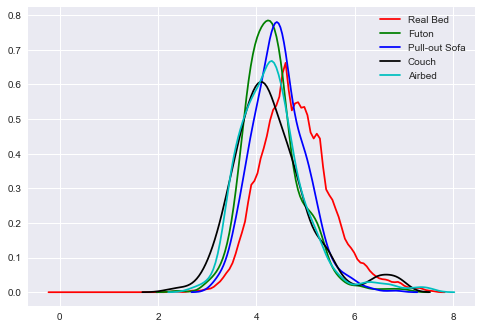

In [77]:
color_list=["r","g","b","k","c","m"]
for i,bed in enumerate(train["bed_type"].unique()):
    sns.kdeplot(train[train["bed_type"]==bed]["log_price"],color=color_list[i],label=bed)
plt.show()

In [320]:
train["extra_guest"]=train["accommodates"]-train["beds"]*2

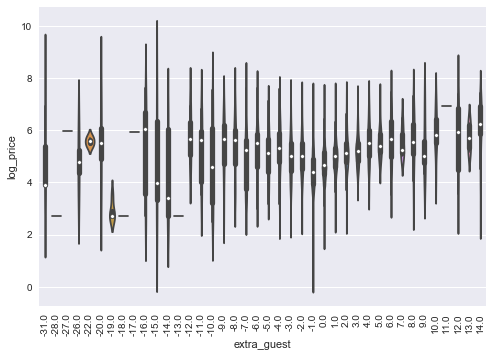

In [321]:
sns.violinplot(x="extra_guest",y="log_price",data=train)
ax=plt.gca()
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)

plt.show()

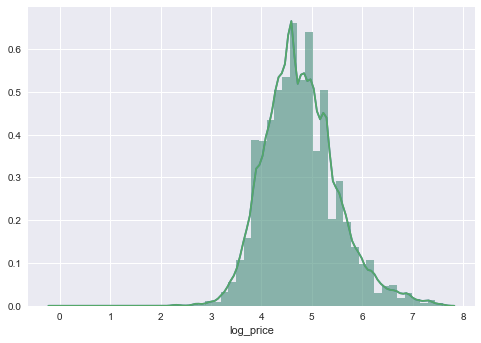

In [231]:
sns.distplot(train["log_price"])
plt.show()

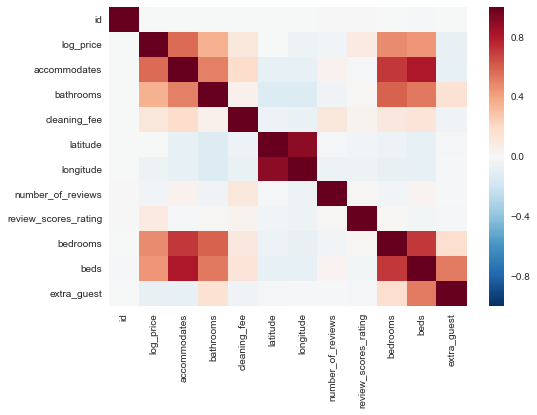

In [234]:
sns.heatmap(train.corr())
plt.show()

In [236]:
train.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'extra_guest'],
      dtype='object')

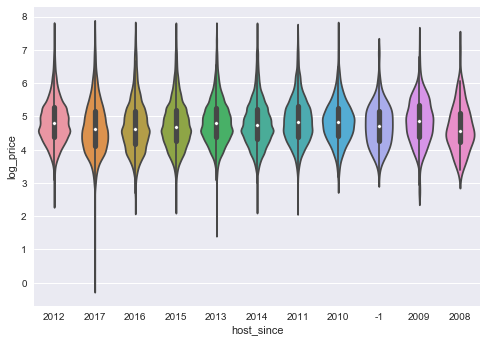

In [247]:
temp_year_host_since=train["host_since"].map(lambda x: x.split("-")[0] if not pd.isnull(x) else -1 )

sns.violinplot(x=temp_year_host_since,y=train["log_price"])
plt.show()

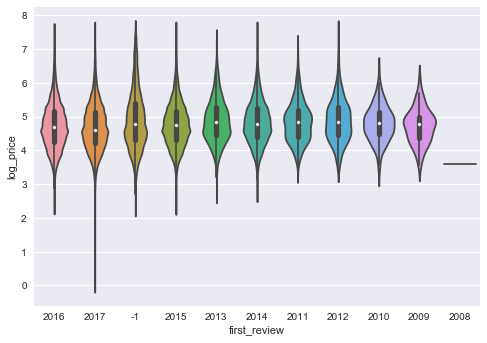

In [248]:
temp_year_first_review=train["first_review"].map(lambda x: x.split("-")[0] if not pd.isnull(x) else -1 )

sns.violinplot(x=temp_year_first_review,y=train["log_price"])
plt.show()

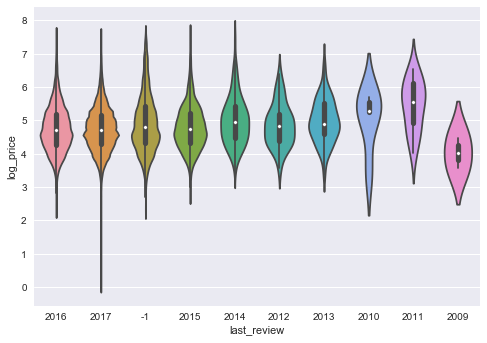

In [276]:
temp_year_last_review=train["last_review"].map(lambda x: x.split("-")[0] if not pd.isnull(x) else -1 )

sns.violinplot(x=temp_year_last_review,y=train["log_price"])
plt.show()

In [322]:
translator=str.maketrans({"{":"","}":"",'''"''':""})
train["num_amenities"]=train["amenities"].str.translate(translator).str.split(",").apply(len)

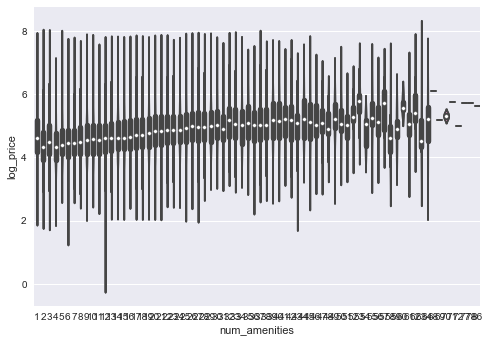

In [266]:
sns.violinplot(x=train["num_amenities"],y=train["log_price"])
plt.show()

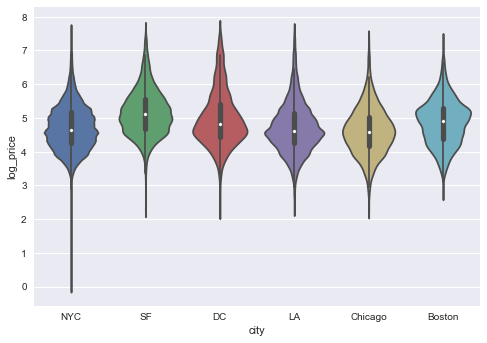

In [329]:
sns.violinplot(x="city",y="log_price",data=train)
plt.show()

In [271]:
train["name"].nunique()

73359

In [281]:
temp_diff_review_year=temp_year_last_review.map(int)-temp_year_first_review.map(int)

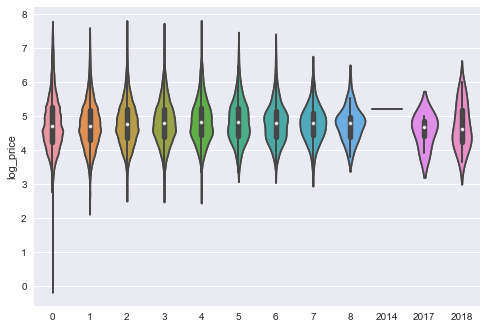

In [283]:
sns.violinplot(x=temp_diff_review_year,y=train["log_price"])
plt.show()

In [290]:
sns.violinplot(x=train["description"].apply(len),y=train["log_price"])

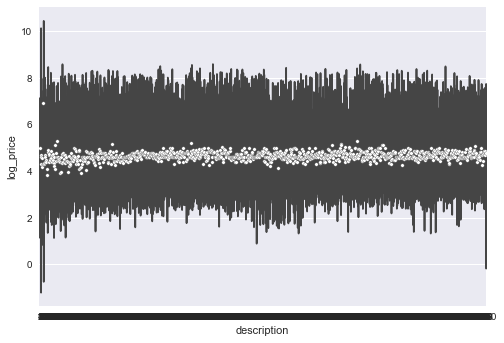

In [291]:
plt.show()

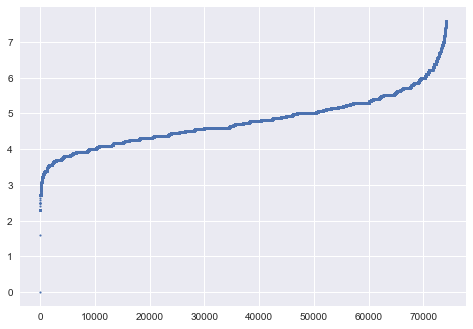

In [310]:
plt.scatter(range(len(train)),train["log_price"].sort_values(),s=3)
plt.show()

0         211
1        1000
2        1000
3         468
4         699
5        1000
6        1000
7        1000
8        1000
9        1000
10       1000
11       1000
12        323
13       1000
14       1000
15       1000
16        654
17       1000
18       1000
19        803
20       1000
21        837
22        924
23       1000
24        965
25       1000
26        489
27        203
28        347
29        222
         ... 
74081    1000
74082    1000
74083     111
74084     684
74085    1000
74086     696
74087     473
74088     456
74089     966
74090    1000
74091     866
74092     610
74093    1000
74094    1000
74095     199
74096     897
74097    1000
74098    1000
74099    1000
74100    1000
74101     188
74102     463
74103    1000
74104    1000
74105    1000
74106      25
74107     302
74108    1000
74109     555
74110    1000
Name: description, Length: 74111, dtype: int64

In [328]:
train.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'extra_guest', 'num_amenities'],
      dtype='object')